In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
tr_data = pd.read_csv('Human_act_train.csv')
ts_data = pd.read_csv('Human_act_test.csv')
tr_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
print(tr_data.shape, ts_data.shape)

(7352, 563) (2947, 563)


In [4]:
print(tr_data.isna().sum())
print(ts_data.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64
tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64


There are a total of 7352 records in the training dataset. Also, there are no null values in the dataset. The test dataset contains 2947 records to test our models. This dataset also does not have null values.

The Activity column will be represented by the label y and all other columns will be represented by X(features)

In [5]:
# Get X and y for training data
X_train = tr_data.drop(columns = ['Activity', 'subject'])
y_train = tr_data["Activity"]

# Get X and y for testing data
y_test = ts_data['Activity']
X_test = ts_data.drop(columns = ['Activity', 'subject'])

**Data Visualization**

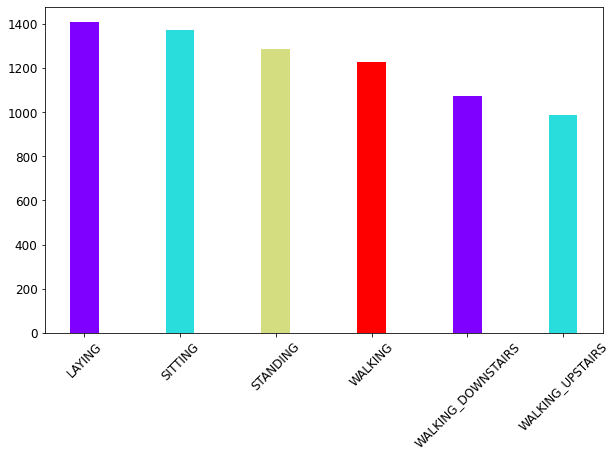

In [6]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
plt.figure(figsize=(10,6))
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=0,fontsize=12)
plt.show()

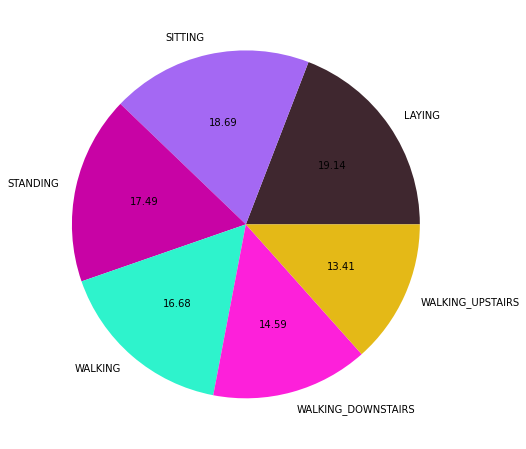

In [7]:
import random
plt.figure(figsize=(16,8))
n = 10
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f', colors = color)
plt.show()

The percentage of values shows that the size of the data for each activity is comparable.

It is easy to identify that there is an accelerometer, gyroscope, and other values in the data set. I can check everyone’s share by plotting a bar graph of each type. Accelerometer values have Acc in them, Gyroscope values have Gyro, and rest can be considered like others:

<BarContainer object of 3 artists>

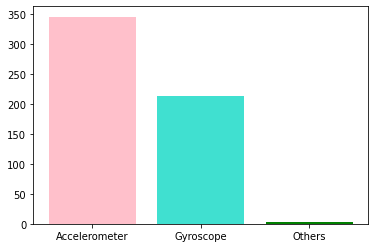

In [8]:
Acc = 0
Gyro = 0
other = 0

for value in X_train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(6,4))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('pink','turquoise','g'))

The accelerometer provides the maximum functionality, followed by the gyroscope. The other features are much less so.

**Human Activity Recognition Model**

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [10]:
# Logistic Regression
model = LogisticRegression().fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_LR = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_LR))

Logistic Regression accuracy: 95.89412962334578%


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# K Nearest Neighbors (KNN)
model = KNeighborsClassifier().fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_knn = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_knn))

K Nearest Neighbors Classifier accuracy: 90.02375296912113%


In [12]:
# Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm

model = SVC().fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy_svm = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_svm))

Support Vector Classifier accuracy: 95.04580929759076%


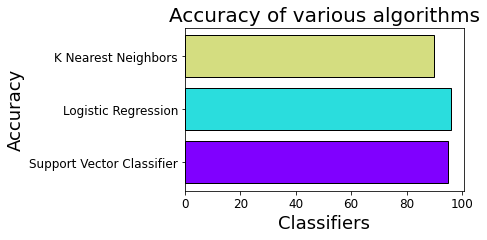

In [13]:
plt.figure(figsize=(5,3))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logistic Regression', 'K Nearest Neighbors']
height = [accuracy_svm, accuracy_LR, accuracy_knn]
plt.barh(labels, height, color = colors, edgecolor = 'black')
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

So we can clearly see that the Logistic Regression model performs the best for the task of Human Activity Recognition with Machine Learning.